## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Exploring Data

In [3]:
len(df)

7043

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
##cutomer ID doesnot depend on leaving
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Preprocessing Data

In [8]:
df.groupby('Churn')['Churn'].agg('count')
##Number of 'No' are more than 'Yes'. The data is an unbalanced data.

Churn
No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df.gender = df.gender.apply(lambda x: 1 if x == 'Male' else 0)
## 1 in gender is Male and 0 in gender is Female

In [10]:
df.Partner = df.Partner.apply(lambda x: 1 if x == 'Yes' else 0)
## 1 in partner is Yes and 0 in partner is No

In [11]:
df.Dependents = df.Dependents.apply(lambda x: 1 if x == 'Yes' else 0)
## 1 in Dependents is Yes and 0 in Dependents is No

In [12]:
df.PhoneService = df.PhoneService.apply(lambda x: 1 if x == 'Yes' else 0)
## 1 in phoneservice is Yes and 0 in phoneservice is No

In [13]:
df.OnlineSecurity.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [14]:
df.MultipleLines = df.MultipleLines.map({'No phone service':0,'No':1,'Yes':2})
## 1 in MultipleLines is No, 2 in MultipleLines is Yes, 0 in MultipleLines is 'NoPhone Service' 

In [15]:
df.InternetService = df.InternetService.map({'No':0,'Fiber optic':1,'DSL':2})
## 0 in InternetService is No, 1 is Fiber Optic, 2 is 'DSL' 

In [16]:
df.OnlineSecurity = df.OnlineSecurity.map({'No internet service':0,'No':1,'Yes':2})
## 0 in OnlineSecurity is No internet service, 1 is No, 2 is 'Yes' 

In [17]:
df.DeviceProtection = df.DeviceProtection.map({'No internet service':0,'No':1,'Yes':2})
## 0 in DeviceProtection is No internet service, 1 is No, 2 is 'Yes' 

In [18]:
df.TechSupport = df.TechSupport.map({'No internet service':0,'No':1,'Yes':2})
## 0 in TechSupport is No internet service, 1 is No, 2 is 'Yes' 

In [19]:
df.StreamingTV = df.StreamingTV.map({'No internet service':0,'No':1,'Yes':2})
## 0 in StreamingTV is No internet service, 1 is No, 2 is 'Yes' 

In [20]:
df.StreamingMovies = df.StreamingMovies.map({'No internet service':0,'No':1,'Yes':2})
## 0 in StreamingMovies is No internet service, 1 is No, 2 is 'Yes' 

In [21]:
df.Contract = df.Contract.map({'Month-to-month':0,'One year':1,'Two year':2})
## 0 in Contract is Month-to-month, 1 is One year, 2 is 'Two year' 

In [22]:
df.OnlineBackup = df.OnlineBackup.map({'No internet service':0,'No':1,'Yes':2})
## 0 in Contract is Month-to-month, 1 is One year, 2 is 'Two year' 

In [23]:
df.PaperlessBilling = df.PaperlessBilling.map({'No':0,'Yes':1})
## 0 in PaperlessBilling is No, 1 is 'Yes' 

In [24]:
df.PaymentMethod = df.PaymentMethod.map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
## 0 in PaperlessBilling is No, 1 is 'Yes' 

In [25]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df = df[df['TotalCharges'].apply(is_float)]

In [27]:
len(df)

7032

In [28]:
df.TotalCharges = df.TotalCharges.astype('float')

In [29]:
df.Churn= df.Churn.apply(lambda x: 1 if x == 'Yes' else 0)
## 1 in gender is Male and 0 in gender is Female

# Exploratory Data Analysis

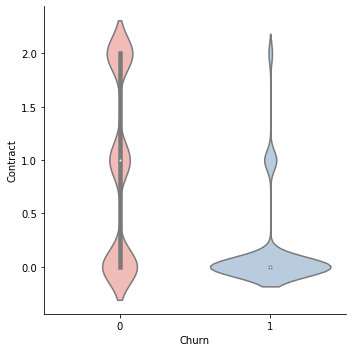

In [30]:
sns.catplot(x='Churn', y='Contract', data= df, kind='violin',palette = 'Pastel1')
#Most of the customers who leave have the Month-to-Month subscription 

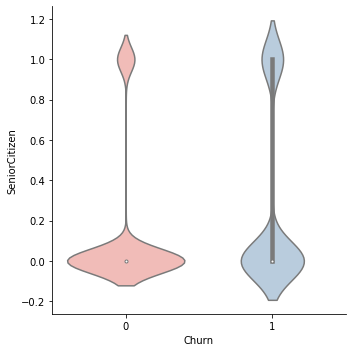

In [31]:
sns.catplot(x='Churn', y='SeniorCitizen', data= df, kind='violin',palette = 'Pastel1')
# Senior Citizens seem to not leave within a month

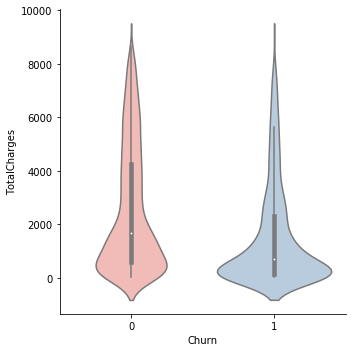

In [32]:
sns.catplot(x='Churn', y='TotalCharges', data= df, kind='violin',palette = 'Pastel1')

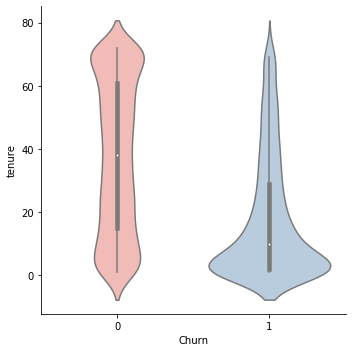

In [33]:
sns.catplot(x='Churn', y='tenure', data= df, kind='violin',palette = 'Pastel1')

In [34]:
df_clean = df.copy()

In [35]:
df_clean.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.010284,0.002236,-0.013233,-0.011081,-0.003168,-0.008215,-0.007163,-0.009072,0.000095,-0.011902,-0.004928,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.113769,0.032160,0.081766,0.144762,0.140226,0.067318,0.167123,0.176125,-0.141820,0.156258,-0.093712,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.118037,-0.000513,0.092034,0.091536,0.099077,0.077252,0.080205,0.076076,0.294094,-0.013957,0.133280,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.019178,-0.044030,-0.028964,-0.061970,-0.068296,-0.040057,-0.085909,-0.099795,0.240556,-0.110131,0.124002,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.259112,0.029835,0.232295,0.253575,0.253834,0.230429,0.200646,0.203834,0.676734,0.004823,0.340939,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.674824,-0.387266,-0.158997,-0.129432,-0.141055,-0.160950,-0.107242,-0.114798,0.003019,0.016696,-0.003106,0.248033,0.113008,0.011691
MultipleLines,-0.010284,0.113769,0.118037,-0.019178,0.259112,0.674824,1.000000,-0.186852,0.069959,0.130978,0.125447,0.069706,0.166256,0.163218,0.084037,0.133538,0.026248,0.491412,0.412495,0.036148
InternetService,0.002236,0.032160,-0.000513,-0.044030,0.029835,-0.387266,-0.186852,1.000000,0.719879,0.650084,0.645266,0.716276,0.592172,0.596779,-0.099579,0.138166,-0.008851,0.322173,0.175691,0.047097
OnlineSecurity,-0.013233,0.081766,0.092034,-0.028964,0.232295,-0.158997,0.069959,0.719879,1.000000,0.704598,0.701112,0.734696,0.661541,0.666682,0.016495,0.184449,0.035563,0.635260,0.483157,0.023014
OnlineBackup,-0.011081,0.144762,0.091536,-0.061970,0.253575,-0.129432,0.130978,0.650084,0.704598,1.000000,0.710790,0.708659,0.702605,0.699828,-0.034745,0.260691,-0.003786,0.710175,0.537726,0.073934


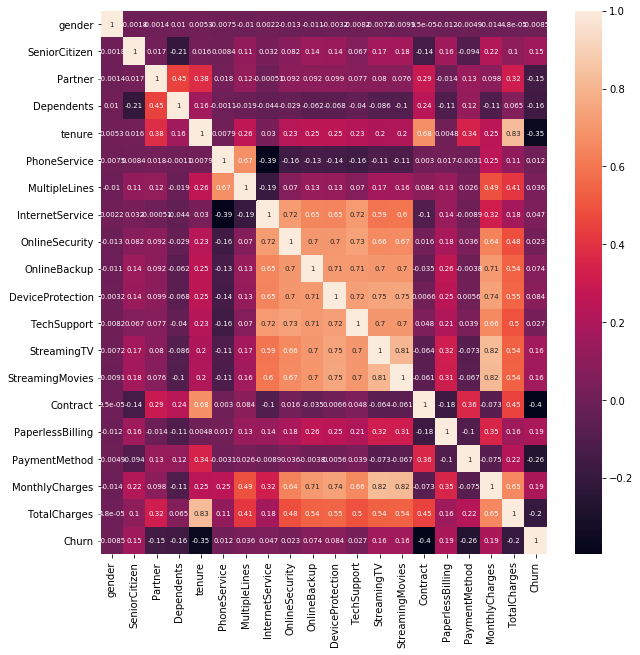

In [36]:
plt.figure(figsize = [10,10])
sns.heatmap(df_clean.corr(),annot=True,annot_kws={'size':7})
plt.show()

# Splitting Data and Fitting Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import shuffle

In [38]:
features = df_clean.drop(['Churn','customerID'],axis = 1)
churn = df_clean.Churn

In [39]:
x_train,x_test,y_train,y_test = train_test_split(features,churn,test_size=0.25, random_state=50)

In [40]:
x_train.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6055,0,0,0,0,6,1,1,2,1,1,1,1,1,2,0,1,0,55.0,340.4


In [41]:
y_train.head(5)

6055    0
5831    1
5942    1
1497    0
2729    1
Name: Churn, dtype: int64

In [42]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

C:\Users\Akhila chowdary\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluating Metrics

In [43]:
lr.score(x_test,y_test)

0.8071672354948806

In [44]:
print(f1_score(y_test,lr.predict(x_test),average = None))
print(f1_score(y_test,lr.predict(x_test)))

[0.87449093 0.58404908]
0.5840490797546012


In [45]:
confusion_matrix(y_test,lr.predict(x_test))

array([[1181,  131],
       [ 208,  238]], dtype=int64)

# Balancing Data

In [46]:
import random

In [47]:
df_yes = df_clean[df_clean['Churn'] == 1]
df_no = df_clean[df_clean['Churn'] == 0]
print(len(df_yes))
print(len(df_no))
df_no_red = df_no[:len(df_yes)]
print(len(df_no_red))


1869
5163
1869


In [48]:
df_bal = pd.concat([df_yes,df_no_red])

In [49]:
df_bal.shape

(3738, 21)

In [50]:
df_bal = shuffle(df_bal)

In [51]:
features = df_bal.drop(['Churn','customerID'],axis = 1)
churn = df_bal.Churn

In [52]:
x_train,x_test,y_train,y_test = train_test_split(features,churn,test_size=0.25, random_state=50)

In [53]:
x_train.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5585,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,19.3,19.3


In [54]:
y_train.head(5)

5585    1
1880    1
2349    0
2354    0
4448    1
Name: Churn, dtype: int64

In [55]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
lr.score(x_test,y_test)

0.73475935828877

In [57]:
print(f1_score(y_test,lr.predict(x_test),average = None))
print(f1_score(y_test,lr.predict(x_test)))

[0.71229698 0.75396825]
0.7539682539682538


In [58]:
confusion_matrix(y_test,lr.predict(x_test))

array([[307, 166],
       [ 82, 380]], dtype=int64)

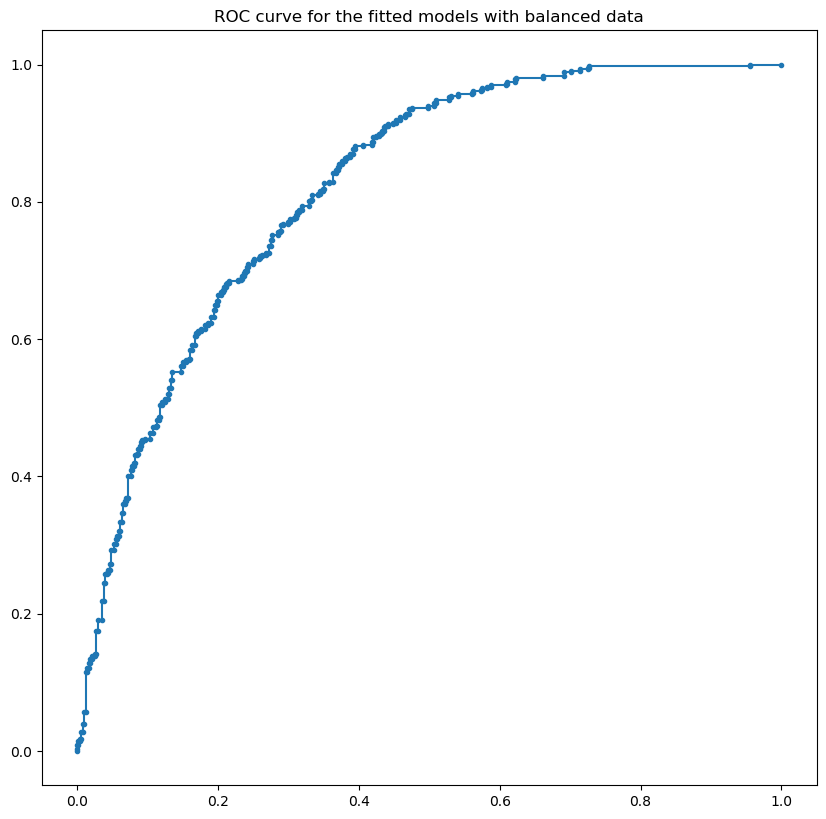

In [59]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test,lr.decision_function(x_test))
auc_logistic = auc(logistic_fpr, logistic_tpr)
plt.figure(figsize=(10, 10), dpi=100)
plt.title('ROC curve for the fitted models with balanced data')
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.show()